In [1]:
# ============================================
# ÉTAPE 1 : EXPLORATION DES DONNÉES (EDA)
# Projet : Estimation de prix immobilier
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librairies importées avec succès")

✅ Librairies importées avec succès


In [2]:
# ============================================
# 1.1 CHARGEMENT DE TOUS LES DATASETS
# ============================================

path = "../Data/raw/"

# Chargement des données
transactions = pd.read_csv(path + "transactions_sample.csv")
taux_interet = pd.read_csv(path + "taux_interet.csv")
taux_endettement = pd.read_csv(path + "taux_endettement.csv")
foyers_fiscaux = pd.read_csv(path + "foyers_fiscaux.csv")
actifs_financiers = pd.read_csv(path + "actifs_financiers.csv")
loyers = pd.read_csv(path + "loyers.csv")
parc_immobilier = pd.read_csv(path + "parc_immobilier.csv")
indice_loyers = pd.read_csv(path + "indice_reference_loyers.csv")
flux_emprunts = pd.read_csv(path + "flux_nouveaux_emprunts.csv")

# Liste des datasets
datasets = {
    "Transactions": transactions,
    "Taux d'intérêt": taux_interet,
    "Taux d'endettement": taux_endettement,
    "Foyers fiscaux": foyers_fiscaux,
    "Actifs financiers": actifs_financiers,
    "Loyers": loyers,
    "Parc immobilier": parc_immobilier,
    "Indice référence loyers": indice_loyers,
    "Flux emprunts": flux_emprunts
}

# Afficher un résumé de chaque dataset
print("="*60)
print("📊 RÉSUMÉ DES DATASETS DISPONIBLES")
print("="*60)
for name, df in datasets.items():
    print(f"\n📁 {name}")
    print(f"   Shape: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print(f"   Colonnes: {list(df.columns)}")

📊 RÉSUMÉ DES DATASETS DISPONIBLES

📁 Transactions
   Shape: 100 lignes × 20 colonnes
   Colonnes: ['id_transaction', 'date_transaction', 'prix', 'departement', 'id_ville', 'ville', 'code_postal', 'adresse', 'type_batiment', 'vefa', 'n_pieces', 'surface_habitable', 'id_parcelle_cadastre', 'latitude', 'longitude', 'surface_dependances', 'surface_locaux_industriels', 'surface_terrains_agricoles', 'surface_terrains_sols', 'surface_terrains_nature']

📁 Taux d'intérêt
   Shape: 116 lignes × 2 colonnes
   Colonnes: ['date', 'taux']

📁 Taux d'endettement
   Shape: 11 lignes × 2 colonnes
   Colonnes: ['date', 'taux_endettement']

📁 Foyers fiscaux
   Shape: 315542 lignes × 15 colonnes
   Colonnes: ['date', 'departement', 'id_ville', 'ville', 'n_foyers_fiscaux', 'revenu_fiscal_moyen', 'montant_impot_moyen', 'n_foyers_0k_10k', 'n_foyers_10k_12k', 'n_foyers_12k_15k', 'n_foyers_15k_20k', 'n_foyers_20k_30k', 'n_foyers_30k_50k', 'n_foyers_50k_100k', 'n_foyers_100k_plus']

📁 Actifs financiers
   Shape:

In [3]:
# ============================================
# 1.2 ANALYSE DU DATASET TRANSACTIONS (Principal)
# ============================================

print("="*60)
print("🏠 ANALYSE DES TRANSACTIONS IMMOBILIÈRES")
print("="*60)

# Aperçu des données
print("\n📋 Aperçu des 5 premières lignes:")
display(transactions.head())

# Types de données
print("\n📊 Types de données:")
print(transactions.dtypes)

# Statistiques descriptives
print("\n📈 Statistiques descriptives (variables numériques):")
display(transactions.describe())

🏠 ANALYSE DES TRANSACTIONS IMMOBILIÈRES

📋 Aperçu des 5 premières lignes:


,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,n_pieces,surface_habitable,id_parcelle_cadastre,latitude,longitude,surface_dependances,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature
0,10160888,2015-07-22,222500.0,63,247,MUROL,63790,5148 COMBE,Maison,False,4,123,63247000ZO0165,45.572973,2.949976,{},{},{},{2387},{}
1,10319766,2024-06-18,218640.0,73,15,LES ALLUES,73550,45 RUE DU GRAND COEUR,Appartement,False,1,23,73015000AB0347,45.398740,6.567602,{0},{},{},{},{}
2,11545562,2020-07-23,254950.0,77,316,MORET-LOING-ET-ORVANNE,77250,1 RUE DE LA CROIX BLANCHE,Maison,False,6,124,773161700B0305,48.333762,2.780830,{},{},{},{815},{}
3,13891173,2022-10-03,380000.0,94,81,VITRY-SUR-SEINE,94400,11 VOIE VICTOR MASSE,Maison,False,3,93,94081000AK0189,48.796988,2.375558,{},{},{},{208},{}
4,11794772,2018-07-12,258000.0,77,284,MEAUX,77100,14 RUE PIERRE BONTEMPS,Maison,False,5,96,77284000AW0090,48.948816,2.891734,{},{},{},{},{}



📊 Types de données:
id_transaction                  int64
date_transaction               object
prix                          float64
departement                     int64
id_ville                        int64
ville                          object
code_postal                     int64
adresse                        object
type_batiment                  object
vefa                             bool
n_pieces                        int64
surface_habitable               int64
id_parcelle_cadastre           object
latitude                      float64
longitude                     float64
surface_dependances            object
surface_locaux_industriels     object
surface_terrains_agricoles     object
surface_terrains_sols          object
surface_terrains_nature        object
dtype: object

📈 Statistiques descriptives (variables numériques):


,id_transaction,prix,departement,id_ville,code_postal,n_pieces,surface_habitable,latitude,longitude
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.365412e+06,2.088397e+05,73.950000,212.020000,56771.140000,3.510000,78.380000,46.033177,1.173969
std,4.349037e+06,1.759325e+05,131.736911,164.692856,27298.615674,1.494062,37.577067,5.635874,8.737550
min,8.344800e+04,5.000000e+02,1.000000,2.000000,1150.000000,0.000000,23.000000,4.939717,-61.106291
25%,4.865362e+06,1.192500e+05,33.000000,76.500000,33377.500000,2.000000,48.750000,45.244383,0.333977
50%,9.454800e+06,1.690000e+05,63.000000,174.500000,63160.000000,4.000000,77.500000,46.951778,2.382485
75%,1.220105e+07,2.420608e+05,78.000000,311.500000,78107.500000,4.000000,96.250000,48.555335,4.792835
max,1.486844e+07,1.271260e+06,973.000000,654.000000,97300.000000,8.000000,204.000000,50.637596,6.855944


❓ ANALYSE DES VALEURS MANQUANTES

📋 Transactions - Valeurs manquantes:


,Valeurs manquantes,Pourcentage (%)


✅ Aucune valeur manquante dans le dataset principal!


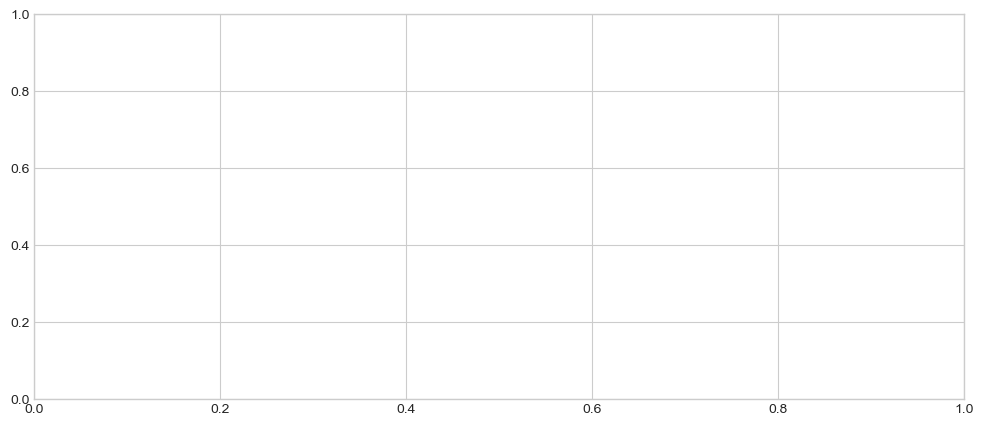

In [4]:
# ============================================
# 1.3 ANALYSE DES VALEURS MANQUANTES
# ============================================

print("="*60)
print("❓ ANALYSE DES VALEURS MANQUANTES")
print("="*60)

# Valeurs manquantes dans transactions
missing = transactions.isnull().sum()
missing_pct = (missing / len(transactions) * 100).round(2)
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_pct
}).sort_values('Valeurs manquantes', ascending=False)

print("\n📋 Transactions - Valeurs manquantes:")
display(missing_df[missing_df['Valeurs manquantes'] > 0])

# Visualisation des valeurs manquantes
fig, ax = plt.subplots(figsize=(12, 5))
missing_to_plot = missing_df[missing_df['Valeurs manquantes'] > 0]
if len(missing_to_plot) > 0:
    sns.barplot(x=missing_to_plot.index, y='Pourcentage (%)', data=missing_to_plot, ax=ax)
    plt.xticks(rotation=45, ha='right')
    plt.title('📊 Pourcentage de valeurs manquantes par colonne')
    plt.ylabel('Pourcentage (%)')
    plt.tight_layout()
    plt.show()
else:
    print("✅ Aucune valeur manquante dans le dataset principal!")

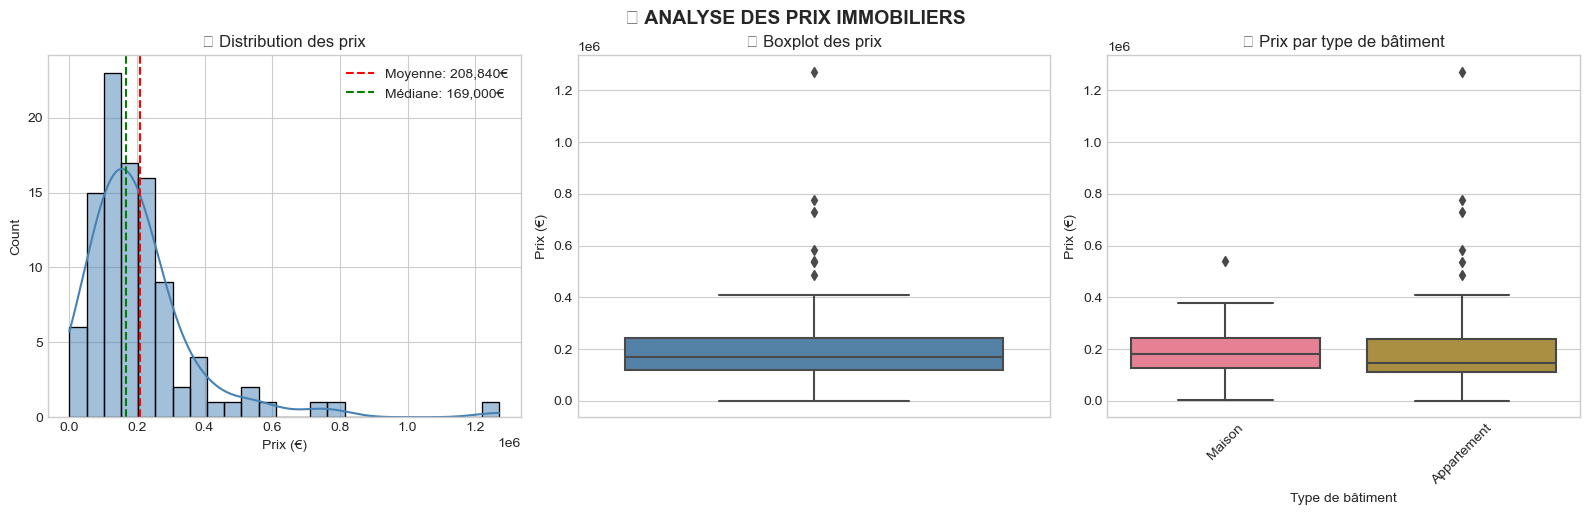


📈 Statistiques clés des prix:
   Prix moyen: 208,839.72 €
   Prix médian: 169,000.00 €
   Prix min: 500.00 €
   Prix max: 1,271,260.00 €
   Écart-type: 175,932.48 €


In [5]:
# ============================================
# 1.4 DISTRIBUTION DES PRIX IMMOBILIERS
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Distribution des prix
sns.histplot(transactions['prix'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('📊 Distribution des prix')
axes[0].set_xlabel('Prix (€)')
axes[0].axvline(transactions['prix'].mean(), color='red', linestyle='--', label=f"Moyenne: {transactions['prix'].mean():,.0f}€")
axes[0].axvline(transactions['prix'].median(), color='green', linestyle='--', label=f"Médiane: {transactions['prix'].median():,.0f}€")
axes[0].legend()

# Boxplot des prix
sns.boxplot(y=transactions['prix'], ax=axes[1], color='steelblue')
axes[1].set_title('📦 Boxplot des prix')
axes[1].set_ylabel('Prix (€)')

# Prix par type de bâtiment
sns.boxplot(x='type_batiment', y='prix', data=transactions, ax=axes[2])
axes[2].set_title('🏠 Prix par type de bâtiment')
axes[2].set_xlabel('Type de bâtiment')
axes[2].set_ylabel('Prix (€)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('💰 ANALYSE DES PRIX IMMOBILIERS', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Statistiques clés
print("\n📈 Statistiques clés des prix:")
print(f"   Prix moyen: {transactions['prix'].mean():,.2f} €")
print(f"   Prix médian: {transactions['prix'].median():,.2f} €")
print(f"   Prix min: {transactions['prix'].min():,.2f} €")
print(f"   Prix max: {transactions['prix'].max():,.2f} €")
print(f"   Écart-type: {transactions['prix'].std():,.2f} €")

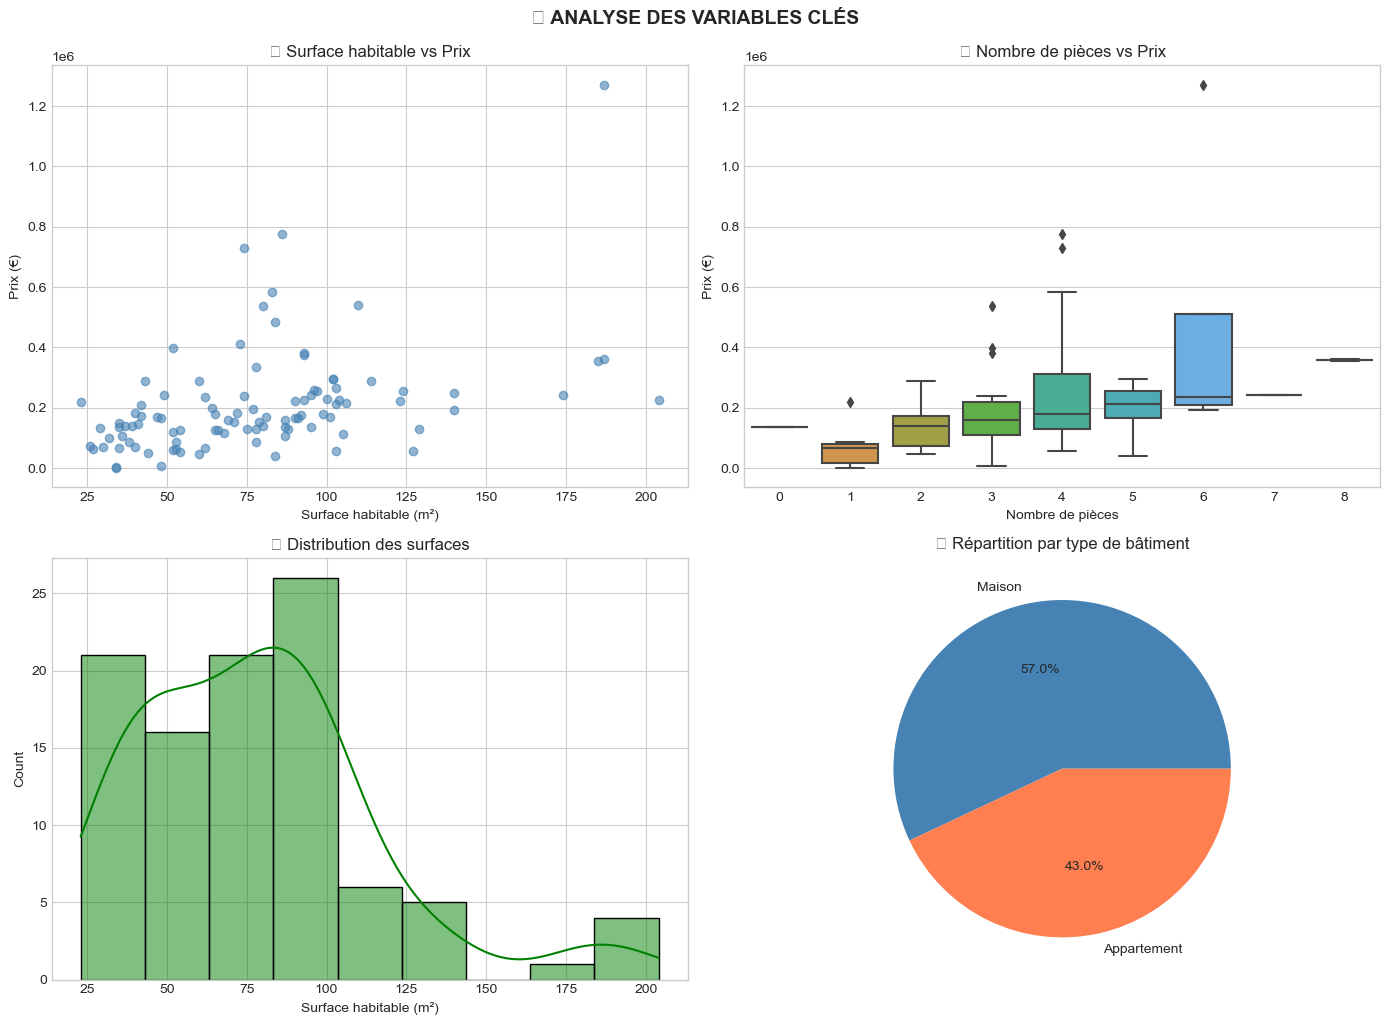


📊 Corrélation surface/prix: 0.429


In [6]:
# ============================================
# 1.5 ANALYSE DES VARIABLES CLÉS
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Surface habitable vs Prix
axes[0, 0].scatter(transactions['surface_habitable'], transactions['prix'], alpha=0.6, c='steelblue')
axes[0, 0].set_xlabel('Surface habitable (m²)')
axes[0, 0].set_ylabel('Prix (€)')
axes[0, 0].set_title('📐 Surface habitable vs Prix')

# Nombre de pièces vs Prix
sns.boxplot(x='n_pieces', y='prix', data=transactions, ax=axes[0, 1])
axes[0, 1].set_xlabel('Nombre de pièces')
axes[0, 1].set_ylabel('Prix (€)')
axes[0, 1].set_title('🚪 Nombre de pièces vs Prix')

# Distribution des surfaces
sns.histplot(transactions['surface_habitable'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_xlabel('Surface habitable (m²)')
axes[1, 0].set_title('📊 Distribution des surfaces')

# Répartition par type de bâtiment
type_counts = transactions['type_batiment'].value_counts()
axes[1, 1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['steelblue', 'coral'])
axes[1, 1].set_title('🏠 Répartition par type de bâtiment')

plt.tight_layout()
plt.suptitle('🔍 ANALYSE DES VARIABLES CLÉS', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Corrélation surface/prix
corr_surface_prix = transactions['surface_habitable'].corr(transactions['prix'])
print(f"\n📊 Corrélation surface/prix: {corr_surface_prix:.3f}")

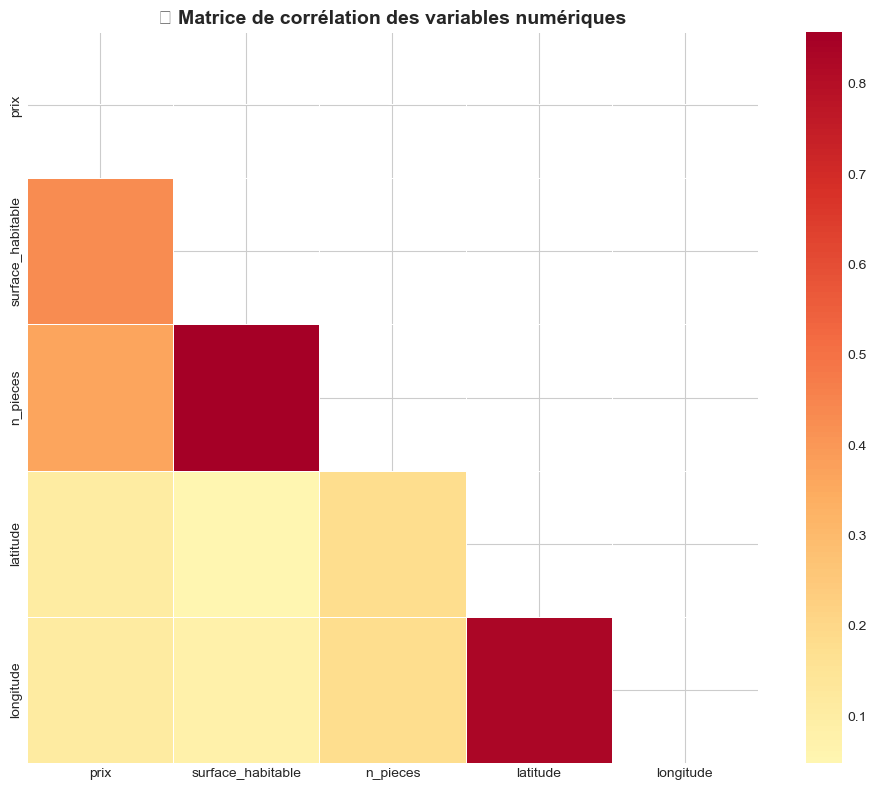


📊 Corrélations avec le prix:
prix                 1.000000
surface_habitable    0.429221
n_pieces             0.365469
longitude            0.113766
latitude             0.104624
Name: prix, dtype: float64


In [7]:
# ============================================
# 1.6 MATRICE DE CORRÉLATION
# ============================================

# Sélection des variables numériques
numeric_cols = ['prix', 'surface_habitable', 'n_pieces', 'latitude', 'longitude']
corr_matrix = transactions[numeric_cols].corr()

# Visualisation
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, fmt='.3f')
plt.title('🔗 Matrice de corrélation des variables numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Corrélations avec le prix:")
print(corr_matrix['prix'].sort_values(ascending=False))

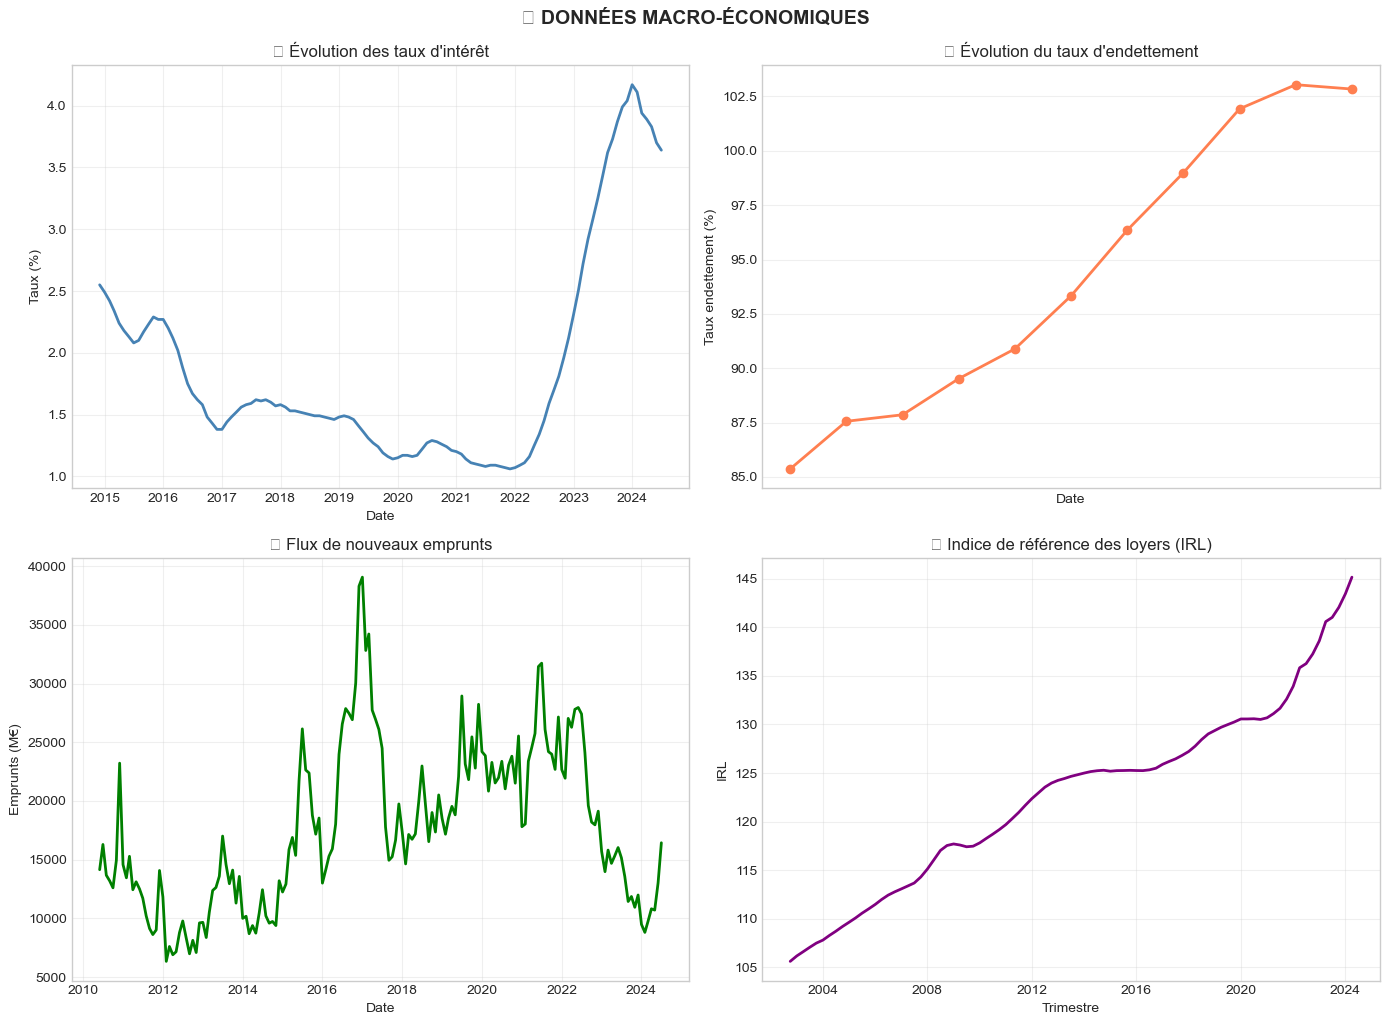

In [8]:
# ============================================
# 1.7 ANALYSE DES DONNÉES MACRO-ÉCONOMIQUES
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Taux d'intérêt
taux_interet['date'] = pd.to_datetime(taux_interet['date'])
axes[0, 0].plot(taux_interet['date'], taux_interet['taux'], color='steelblue', linewidth=2)
axes[0, 0].set_title("📉 Évolution des taux d'intérêt")
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Taux (%)')
axes[0, 0].grid(True, alpha=0.3)

# Taux d'endettement
taux_endettement['date'] = pd.to_datetime(taux_endettement['date'])
axes[0, 1].plot(taux_endettement['date'], taux_endettement['taux_endettement'], color='coral', linewidth=2, marker='o')
axes[0, 1].set_title("📊 Évolution du taux d'endettement")
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Taux endettement (%)')
axes[0, 1].grid(True, alpha=0.3)

# Flux emprunts
flux_emprunts['date'] = pd.to_datetime(flux_emprunts['date'])
axes[1, 0].plot(flux_emprunts['date'], flux_emprunts['emprunts_M€'], color='green', linewidth=2)
axes[1, 0].set_title("💰 Flux de nouveaux emprunts")
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Emprunts (M€)')
axes[1, 0].grid(True, alpha=0.3)

# Indice de référence des loyers
indice_loyers['quarter'] = pd.to_datetime(indice_loyers['quarter'])
axes[1, 1].plot(indice_loyers['quarter'], indice_loyers['IRL'], color='purple', linewidth=2)
axes[1, 1].set_title("📈 Indice de référence des loyers (IRL)")
axes[1, 1].set_xlabel('Trimestre')
axes[1, 1].set_ylabel('IRL')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('📊 DONNÉES MACRO-ÉCONOMIQUES', fontsize=14, fontweight='bold', y=1.02)
plt.show()

🏢 ANALYSE DES LOYERS

Nombre d'observations: 105391

Aperçu des données:


,departement,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison
0,1,1,L'Abergement-Clémenciat,2018,9.372335,8.191701
1,1,2,L'Abergement-de-Varey,2018,8.635552,7.441199
2,1,4,Ambérieu-en-Bugey,2018,10.074507,8.411184
3,1,5,Ambérieux-en-Dombes,2018,9.372335,9.039551
4,1,6,Ambléon,2018,8.966955,8.058265



📊 Statistiques des loyers au m²:
   Appartements - Moyenne: 9.36 €/m²
   Appartements - Médiane: 8.92 €/m²
   Maisons - Moyenne: 8.06 €/m²
   Maisons - Médiane: 7.62 €/m²


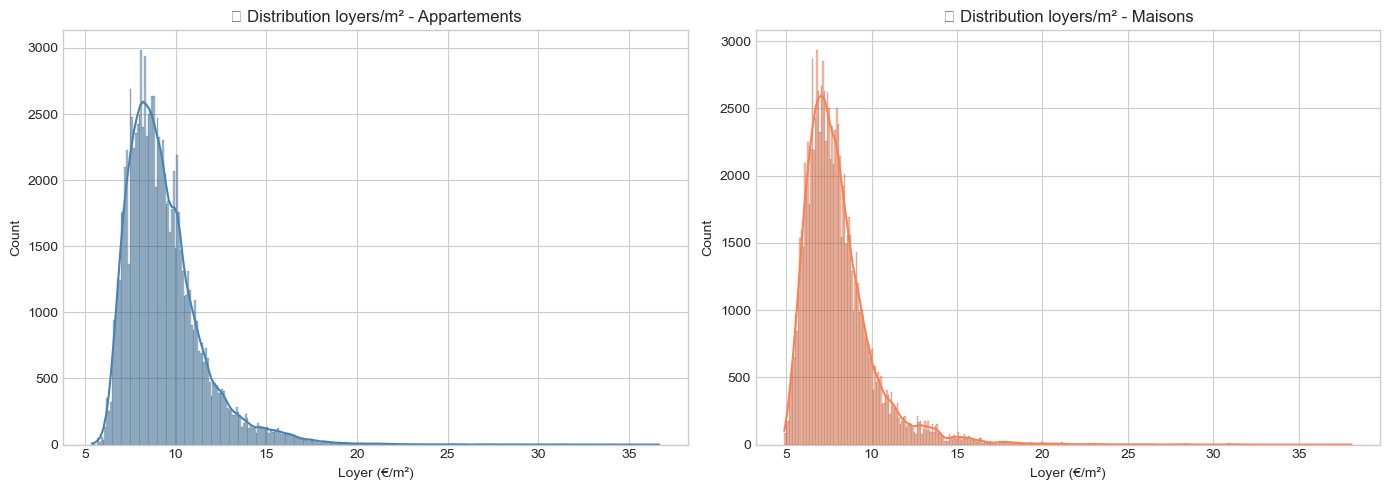

In [9]:
# ============================================
# 1.8 ANALYSE DES LOYERS PAR LOCALISATION
# ============================================

# Aperçu des loyers
print("="*60)
print("🏢 ANALYSE DES LOYERS")
print("="*60)
print(f"\nNombre d'observations: {len(loyers)}")
print(f"\nAperçu des données:")
display(loyers.head())

# Statistiques des loyers
print("\n📊 Statistiques des loyers au m²:")
print(f"   Appartements - Moyenne: {loyers['loyer_m2_appartement'].mean():.2f} €/m²")
print(f"   Appartements - Médiane: {loyers['loyer_m2_appartement'].median():.2f} €/m²")
print(f"   Maisons - Moyenne: {loyers['loyer_m2_maison'].mean():.2f} €/m²")
print(f"   Maisons - Médiane: {loyers['loyer_m2_maison'].median():.2f} €/m²")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(loyers['loyer_m2_appartement'].dropna(), kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('📊 Distribution loyers/m² - Appartements')
axes[0].set_xlabel('Loyer (€/m²)')

sns.histplot(loyers['loyer_m2_maison'].dropna(), kde=True, ax=axes[1], color='coral')
axes[1].set_title('📊 Distribution loyers/m² - Maisons')
axes[1].set_xlabel('Loyer (€/m²)')

plt.tight_layout()
plt.show()

In [10]:
# ============================================
# 1.9 CONCLUSION DE L'EXPLORATION
# ============================================

print("="*70)
print("📋 RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("="*70)

print("""
🎯 PROBLÈME MÉTIER IDENTIFIÉ:
   → Estimation du prix immobilier pour aider acheteurs et vendeurs

📊 DONNÉES DISPONIBLES:
   → 100 transactions immobilières avec prix, surface, localisation
   → Données macro-économiques (taux d'intérêt, endettement, emprunts)
   → Données fiscales par ville (315k observations)
   → Données de loyers par ville (105k observations)
   → Données sur le parc immobilier

📈 INSIGHTS CLÉS:
   → Prix moyen: 208,840 € | Médian: 169,000 €
   → 57% de maisons, 43% d'appartements
   → Corrélation surface/prix: 0.43 (modérée positive)
   → Corrélation n_pièces/prix: 0.37
   → Les taux d'intérêt ont fortement augmenté depuis 2022

🔧 FEATURES POTENTIELLES POUR LE MODÈLE:
   1. Surface habitable (corrélation: 0.43)
   2. Nombre de pièces (corrélation: 0.37)
   3. Type de bâtiment (Maison/Appartement)
   4. Localisation (département, ville)
   5. Données macro: taux d'intérêt, loyers moyens locaux

⚠️ LIMITATIONS:
   → Échantillon limité (100 transactions)
   → Données temporelles à aligner (différentes périodes)
""")

print("="*70)
print("✅ PROCHAINE ÉTAPE: PREPROCESSING DES DONNÉES")
print("="*70)

📋 RÉSUMÉ DE L'EXPLORATION DES DONNÉES

🎯 PROBLÈME MÉTIER IDENTIFIÉ:
   → Estimation du prix immobilier pour aider acheteurs et vendeurs

📊 DONNÉES DISPONIBLES:
   → 100 transactions immobilières avec prix, surface, localisation
   → Données macro-économiques (taux d'intérêt, endettement, emprunts)
   → Données fiscales par ville (315k observations)
   → Données de loyers par ville (105k observations)
   → Données sur le parc immobilier

📈 INSIGHTS CLÉS:
   → Prix moyen: 208,840 € | Médian: 169,000 €
   → 57% de maisons, 43% d'appartements
   → Corrélation surface/prix: 0.43 (modérée positive)
   → Corrélation n_pièces/prix: 0.37
   → Les taux d'intérêt ont fortement augmenté depuis 2022

🔧 FEATURES POTENTIELLES POUR LE MODÈLE:
   1. Surface habitable (corrélation: 0.43)
   2. Nombre de pièces (corrélation: 0.37)
   3. Type de bâtiment (Maison/Appartement)
   4. Localisation (département, ville)
   5. Données macro: taux d'intérêt, loyers moyens locaux

⚠️ LIMITATIONS:
   → Échantillon 